In [3]:
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import funcoes as fun

In [4]:
dir_dados = "dados_com_evap_manso.csv"
# "MANSO": Dados Naturais
# "COIMBRA_F": Dados Observados
# "COIMBRA_P": Dados de chuva
dados_nat = fun.dados(dir_dados, label="MANSO")

# Cap.: 3 - Função de Massa de Probabilidade

A **Função de Massa de Probabilidade (PMF)** é uma maneira de representar uma distribuição e mapeia as probabilidade relativa de cada valor;

- Probabilidade é a divisão da frequência pelo tamanho da amostra;

Como a pmf é normalizada, a probilidade total é 1;

In [5]:
#Mês ínicio do ano hidrológico
inicio = fun.month_start_year_hydrologic(dados_nat)

#Dados de máximas anuais
dados_nat_max = fun.annual(dados_nat, inicio)

In [6]:
#plotar hidrograma de máximas anuais

In [7]:
#PMF
pmf_nat = thinkstats2.Pmf(dados_nat_max)
print('Probabilidade Total: ', pmf_nat.Total())

Probabilidade Total:  1.0000000000000002


Pmf e Hist são objetos similires em muitos aspectos;

A diferneça é:

- **Hist** contabiliza valores inteiros;

- **PMF** contabiliza probabilidades de ponto flutuantes;

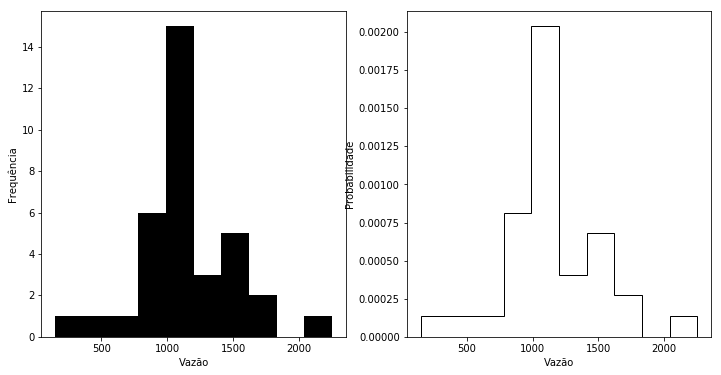

In [8]:
thinkplot.PrePlot(1, cols=2)
counts, bins = np.histogram(dados_nat_max)
hist = plt.hist(bins[:-1], bins, weights=counts, color='black')
thinkplot.Config(xlabel='Vazão', ylabel='Frequência')

thinkplot.SubPlot(2)
counts, bins = np.histogram(dados_nat_max, density=True)
_ = plt.hist(bins[:-1], bins, weights=counts, color='black', histtype='step')
thinkplot.Config(xlabel='Vazão', ylabel='Probabilidade')

In [12]:
q95 = dados_nat.quantile(0.95)
print('Probabiidade: ', pmf_nat.ProbGreater(q95))

Probabiidade:  0.9428571428571431


In [23]:
# "COIMBRA_F": Dados Observados
dados_obs = fun.dados(dir_dados, label="COIMBRA_F")

#Mês ínicio do ano hidrológico
inicio = fun.month_start_year_hydrologic(dados_obs)

#Dados de máximas anuais
dados_obs_max = fun.annual(dados_obs, inicio)
pmf_obs = thinkstats2.Pmf(dados_obs_max)

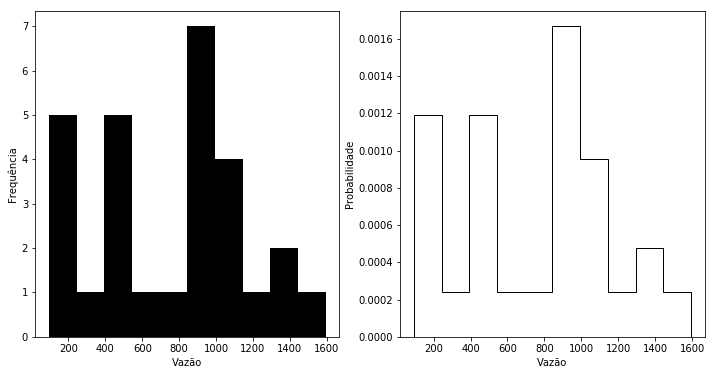

In [24]:
thinkplot.PrePlot(1, cols=2)
counts, bins = np.histogram(dados_obs_max)
_ = plt.hist(bins[:-1], bins, weights=counts, color='black')
thinkplot.Config(xlabel='Vazão', ylabel='Frequência')

thinkplot.SubPlot(2)
counts, bins = np.histogram(dados_obs_max, density=True)
_ = plt.hist(bins[:-1], bins, weights=counts, color='black', histtype='step')
thinkplot.Config(xlabel='Vazão', ylabel='Probabilidade')

## As limitações das PMFs

- As Pmfs funcionam bem para tamanhos pequenos;

- Com o aumento do tamanho, a probabilidade diminui e aumenta os ruídos;

- Quando se tem uma amostra grande, é difícil de se fazer comparações usando uma Pmf;

- Podemos usar categorias para minizar esse problema, mas difícil de obter o tamanho de cada categoria;

- Uma outra solução é utilizar Função de Distribuição Acumulada (no inglês CDF).

# Cap.: 4 - Função de Distribuição Acumulada

## Percentis

- O percentil é o valor de uma evento ser menor ou igual;

- Percentil Rank: Calcula a classificação percentual do valor(recebido) em um conjunto de valores;

- Percentil: Calcula o valor correspondente ao percentil(recebido);

## CDFs

- A CDF mapeia os valores para um rank percentil;

- Para avaliar valor particular de uma vazão x, calculamos a fração de valores na distribuição menor ou igual a vazão x;

- Na CDF podemos avaliar qualquer valor, não apenas valores que aparecem na amostra;

A CDF dos valores de vazão máximas anuais é representada a seguir

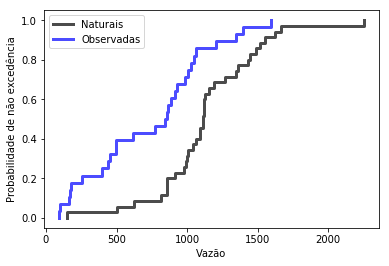

<Figure size 576x432 with 0 Axes>

In [25]:
cdf_nat_max = thinkstats2.Cdf(dados_nat_max, label='Naturais')
cdf_obs_max = thinkstats2.Cdf(dados_obs_max, label='Observadas')
thinkplot.Cdf(cdf_nat_max, color='black')
thinkplot.Cdf(cdf_obs_max, color='blue')
thinkplot.Show(xlabel='Vazão', ylabel='Probabilidade de não excedência')

A CDF apresenta algumas vantagens em relaçõa a PMF:

- A CDF também fornece uma representação visual da forma da distribuição;

- Os valores mais comuns aparecem na parte mais íngreme da CDF;

- As informações de uma CDF são apresentadas com mais clareza do que uma PMF;

- As CDFs são especialmente úteis para comparações, as diferenças entre distribuições são mais claras na Cdf;

Os percentil são usados para computar algumas estatísticas:

- Percentil 50°, corresponde ao valor central da distribuição, conhecido como **mediana**;

- Outra estatítica é o **intervalo interquantil**, que é a diferença entre o percentil 75° e 25°;

Usados para resumir a forma de uma distribuição.

In [27]:
p_nat_1 = cdf_nat_max.PercentileRank(1000)
p_nat_2 = cdf_nat_max.PercentileRank(2000)

p_obs_1 = cdf_obs_max.PercentileRank(1000)
p_obs_2 = cdf_obs_max.PercentileRank(2000)

print('Rank Percentil(NAT) de 1000: ', p_nat_1)
print('Rank Percentil(OBS) de 1000: ', p_obs_1)
print('Rank Percentil(NAT) de 2000: ', p_nat_2)
print('Rank Percentil(OBS) de 2000: ', p_obs_2)

Rank Percentil(NAT) de 1000:  31.428571428571427
Rank Percentil(OBS) de 1000:  71.42857142857143
Rank Percentil(NAT) de 2000:  97.14285714285714
Rank Percentil(OBS) de 2000:  100.0


**Quartis** das máximas anuais naturais 

In [28]:
q_nat_1 = cdf_nat_max.Percentile(25)
q_nat_2 = cdf_nat_max.Percentile(50)
q_nat_3 = cdf_nat_max.Percentile(75)

print('Valor referente ao percentil 25: ', q_nat_1)
print('Valor referente ao percentil 50: ', q_nat_2)
print('Valor referente ao percentil 75: ', q_nat_3)

Valor referente ao percentil 25:  977.0
Valor referente ao percentil 50:  1113.0
Valor referente ao percentil 75:  1358.0


**Quartis** das máximas anuais observadas

In [30]:
q_obs_1 = cdf_obs_max.Percentile(25)
q_obs_2 = cdf_obs_max.Percentile(50)
q_obs_3 = cdf_obs_max.Percentile(75)

print('Valor referente ao percentil 25: ', q_obs_1)
print('Valor referente ao percentil 50: ', q_obs_2)
print('Valor referente ao percentil 75: ', q_obs_3)

Valor referente ao percentil 25:  400.108
Valor referente ao percentil 50:  845.638
Valor referente ao percentil 75:  1006.577
